In [849]:
#load in packages
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import contextily as cx
import warnings
import geoplot as gplt
import geoplot.crs as gcrs
from numpy import log10
import os

#Allow full display of columns in data
pd.set_option("display.max_columns", 100,"display.max_rows",100)

In [657]:
#Read in dpdcalls data set
dpdcalls = gpd.read_file('/Users/sadiesheridan/Desktop/dpdshapefile/dpdshapefile.shp')
dpdcalls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [658]:
#Read in policebeats data set
policebeats = gpd.read_file('/Users/sadiesheridan/Desktop/Police_Beats/Police_Beats.shp')
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [659]:
#Print .info() for policebeats
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    119 non-null    int64   
 1   PERIMETER   119 non-null    float64 
 2   STATUS      83 non-null     object  
 3   CONTIGUOUS  83 non-null     object  
 4   LAWDIST     119 non-null    object  
 5   LAWBEAT     119 non-null    int64   
 6   CAD         119 non-null    object  
 7   GIS_DataA1  0 non-null      object  
 8   ShapeSTAre  119 non-null    float64 
 9   ShapeSTLen  119 non-null    float64 
 10  geometry    119 non-null    geometry
dtypes: float64(3), geometry(1), int64(2), object(5)
memory usage: 10.4+ KB


In [660]:
#Print .info() for dpdcalls
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 331077 entries, 0 to 331076
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  331077 non-null  int64   
 1   Case Numbe  45954 non-null   object  
 2   Call Date   331077 non-null  object  
 3   Call Time   331077 non-null  object  
 4   Source      331077 non-null  object  
 5   Priority    330425 non-null  object  
 6   Nature      331076 non-null  object  
 7   Address     330437 non-null  object  
 8   X           331077 non-null  int64   
 9   Y           331077 non-null  int64   
 10  District    319334 non-null  object  
 11  Beat        319315 non-null  object  
 12  Dispositio  331077 non-null  object  
 13  Cancelled   331077 non-null  int64   
 14  geometry    331077 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 37.9+ MB


In [661]:
#Print null values with df.isna().sum() function
dpdcalls.isna().sum()

Event Numb         0
Case Numbe    285123
Call Date          0
Call Time          0
Source             0
Priority         652
Nature             1
Address          640
X                  0
Y                  0
District       11743
Beat           11762
Dispositio         0
Cancelled          0
geometry           0
dtype: int64

In [662]:
#Looking at records with coordinates zero
dpdcalls.loc[(dpdcalls["X"] == 0) | (dpdcalls["Y"] == 0)]

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
127,21000194,None,1/1/2021,1:25:25AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 11 147 NB,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
131,21000199,None,1/1/2021,1:29:04AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 147S AND BLACKWELL ST,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
210,21000322,None,1/1/2021,3:56:22AM,Self Initiated,5,DIRECTED PATROL,3407 3RD FORK RD,0,0,None,None,Cancelled,1,POINT (-85.56829 33.56815)
255,21000381,None,1/1/2021,6:14:49AM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 1010 N DURHAM FREEWAY,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
274,21000409,None,1/1/2021,7:03:23AM,Self Initiated,4,FOLLOW UP,SS1,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330699,21477803,21045233,12/31/2021,6:00:48PM,Mobil,4,ATTEMPT TO LOCATE,UNAUTHORIZED USE AT 215 WILLIAM PENN PLAZA APT...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330858,21478039,None,12/31/2021,8:24:41PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 4623 DURHAM CHAPEL HI...,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)
330963,21478179,None,12/31/2021,10:06:37PM,Self Initiated,4,PROPERTY CHECK,1223 HOMECOMING WY,0,0,None,None,Resolved Without Report,0,POINT (-85.56829 33.56815)
331057,21478324,None,12/31/2021,11:45:43PM,Self Initiated,4,ATTEMPT TO LOCATE,CARELESS AND RECKLESS AT 17900 I85 S,0,0,None,None,(blank),0,POINT (-85.56829 33.56815)


In [663]:
#Filter out null x and y values
dpdcalls = dpdcalls.loc[~(dpdcalls["X"] == 0) & ~(dpdcalls["Y"] == 0)].copy()
dpdcalls.shape

(322145, 15)

In [664]:
#Filter out cancelled calls and self initiated calls
dpdcalls = dpdcalls.loc[dpdcalls["Source"] != "Self Initiated"].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Cancelled"] == 0].copy()
dpdcalls = dpdcalls.loc[(dpdcalls["Beat"] != "DSO") & (dpdcalls["Beat"] != "SSA")].copy()
dpdcalls = dpdcalls.loc[dpdcalls["Nature"] != "HANG UP"].copy()
twotosix = ['2', '3', '4', '5', '6']
dpdcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)].copy()
dpdcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


In [665]:
#Filter out beats not in Durham for policebeats
policebeats_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
policebeats = policebeats.loc[policebeats["LAWBEAT"].isin(policebeats_list)].copy()
policebeats.shape

(83, 11)

In [867]:
#Dissolving duplicate beats
policebeats = policebeats.to_crs("4326")
policebeats = policebeats.dissolve(by="LAWBEAT")
policebeats["LBeat"] = policebeats.index
policebeats = policebeats.reset_index()
policebeats["id"] = policebeats.index
policebeats.head()

,LAWBEAT,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,LBeat,id
0,111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2
3,114,"MULTIPOLYGON (((-78.83998 35.95407, -78.83974 ...",65,53321.980469,I,yes,D1,114,None,6.103382e+07,53321.974873,114,3
4,121,"MULTIPOLYGON (((-78.80704 35.99734, -78.80716 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4


In [667]:
#Print changes
dpdcalls.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 109278 entries, 0 to 331065
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  109278 non-null  int64   
 1   Case Numbe  29890 non-null   object  
 2   Call Date   109278 non-null  object  
 3   Call Time   109278 non-null  object  
 4   Source      109278 non-null  object  
 5   Priority    109278 non-null  object  
 6   Nature      109278 non-null  object  
 7   Address     109278 non-null  object  
 8   X           109278 non-null  int64   
 9   Y           109278 non-null  int64   
 10  District    109165 non-null  object  
 11  Beat        109154 non-null  object  
 12  Dispositio  109278 non-null  object  
 13  Cancelled   109278 non-null  int64   
 14  geometry    109278 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 13.3+ MB


In [668]:
policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LAWBEAT     35 non-null     int64   
 1   geometry    35 non-null     geometry
 2   OBJECTID    35 non-null     int64   
 3   PERIMETER   35 non-null     float64 
 4   STATUS      35 non-null     object  
 5   CONTIGUOUS  35 non-null     object  
 6   LAWDIST     35 non-null     object  
 7   CAD         35 non-null     object  
 8   GIS_DataA1  0 non-null      object  
 9   ShapeSTAre  35 non-null     float64 
 10  ShapeSTLen  35 non-null     float64 
 11  LBeat       35 non-null     int64   
 12  id          35 non-null     int64   
dtypes: float64(3), geometry(1), int64(4), object(5)
memory usage: 3.7+ KB


In [868]:
#Merge Calls and Beats data sets with point geometry
dpd_w_policebeats = gpd.sjoin(dpdcalls, policebeats)
dpd_w_policebeats.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry,index_right,LAWBEAT,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,LBeat,id
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886),4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
26,21000042,None,1/1/2021,12:12:40AM,Phone Call,3,SOUND OF SHOTS,2300 WINBURN AVE,2042011,823432,D1,121,Resolved Without Report,0,POINT (-78.85795 36.01237),4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
66,21000100,None,1/1/2021,12:35:47AM,Wireless 911 Call,3,SOUND OF SHOTS,2000-BLK GREAT BEND DR,2045109,826589,D1,121,Resolved Without Report,0,POINT (-78.84746 36.02103),4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
81,21000125,None,1/1/2021,12:46:53AM,Phone Call,3,SOUND OF SHOTS,PEBBLESTONE DR/KNIGHTWOOD DR,2056514,821822,D1,121,Resolved Without Report,0,POINT (-78.80892 36.00788),4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
86,21000133,None,1/1/2021,12:50:17AM,{Other},3,SOUND OF SHOTS,LANDON FARMS LN/E GEER ST,2044580,826205,D1,121,Resolved Without Report,0,POINT (-78.84925 36.01998),4,121,38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4


In [670]:
#Print merged data set info
dpd_w_policebeats.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 108814 entries, 0 to 331048
Data columns (total 28 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Event Numb   108814 non-null  int64   
 1   Case Numbe   29752 non-null   object  
 2   Call Date    108814 non-null  object  
 3   Call Time    108814 non-null  object  
 4   Source       108814 non-null  object  
 5   Priority     108814 non-null  object  
 6   Nature       108814 non-null  object  
 7   Address      108814 non-null  object  
 8   X            108814 non-null  int64   
 9   Y            108814 non-null  int64   
 10  District     108805 non-null  object  
 11  Beat         108805 non-null  object  
 12  Dispositio   108814 non-null  object  
 13  Cancelled    108814 non-null  int64   
 14  geometry     108814 non-null  geometry
 15  index_right  108814 non-null  int64   
 16  LAWBEAT      108814 non-null  int64   
 17  OBJECTID     108814 non-null  int64   
 

In [671]:
#Merge policebats data with call data using polygon geometry
policebeats_w_dpd = gpd.sjoin(policebeats, dpdcalls)
policebeats_w_dpd.info

<bound method DataFrame.info of     LAWBEAT                                           geometry  OBJECTID  \
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
0       111  POLYGON ((-78.89039 36.01517, -78.89038 36.015...        50   
..      ...                                                ...       ...   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   
34      513  POLYGON ((-78.89561 35.99710, -78.89553 35.997...        61   

       PERIMETER STATUS CONTIGUOUS LAWDIST  CAD GIS_Dat

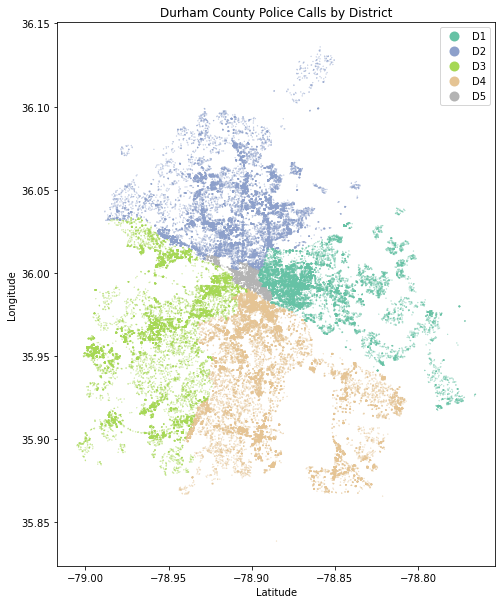

In [672]:
# Plot the call data by district using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpdcalls.plot(column='District', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="Set2", ax=ax, aspect=1);


ax.set(title='Durham County Police Calls by District')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

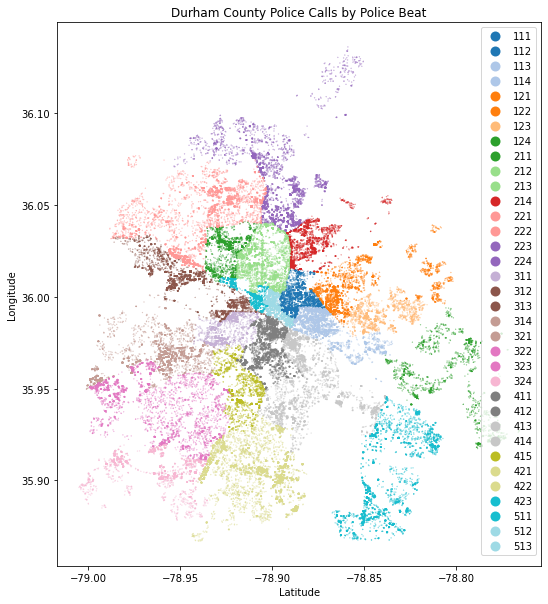

In [673]:
# Plot the dpd_w_policebeats data by Beat using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.05, 
                         cmap="tab20", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

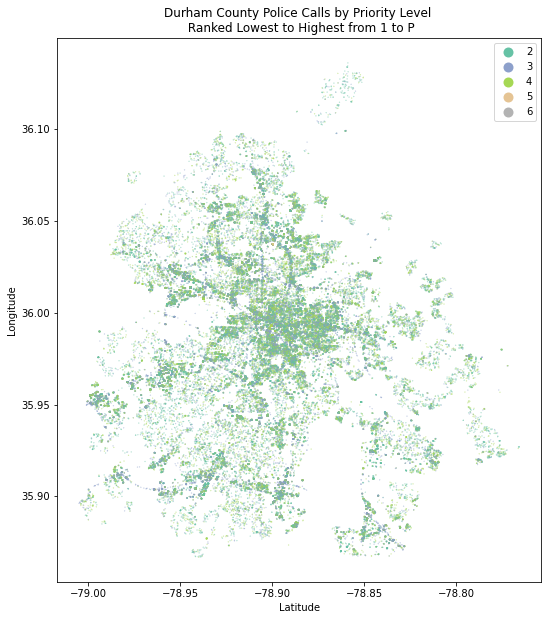

In [674]:
# Plot the call data by Priority using geopandas .plot() method
fig, ax = plt.subplots(figsize = (10,10))

dpd_w_policebeats.plot(column='Priority', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Set2", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Priority Level \n Ranked Lowest to Highest from 1 to P')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

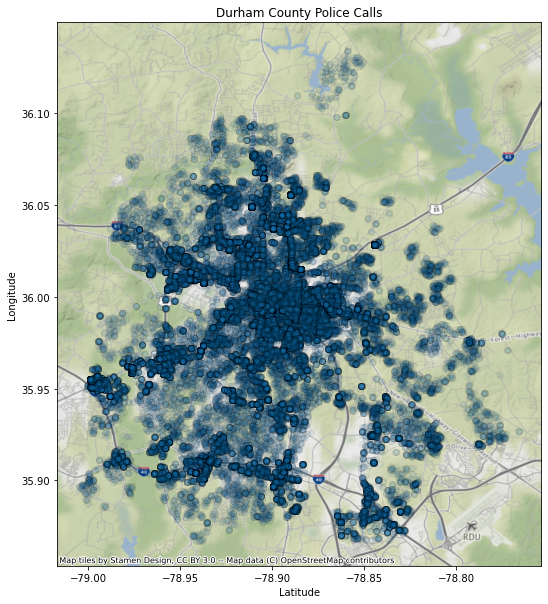

In [675]:
#Adding a base map to the caller data
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.05, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

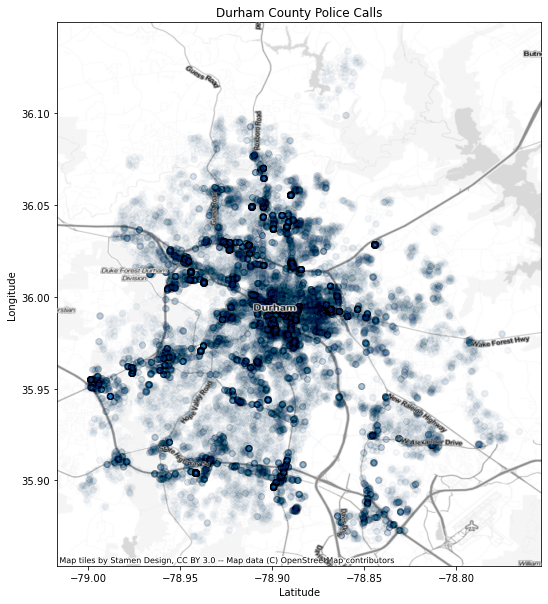

In [676]:
#Adding a base map to the caller data with labels
ax = dpd_w_policebeats.plot(figsize=(10, 10), alpha=0.01, edgecolor='k')
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs=dpd_w_policebeats.crs, source=cx.providers.Stamen.TonerLabels)

ax.set(title='Durham County Police Calls')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

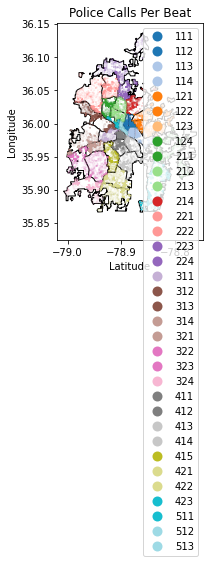

In [677]:
#Plot the two data sets together setting the aspect 'equal'
fig, ax = plt.subplots()

ax.set_aspect('equal')

policebeats.plot(ax=ax, color='white', edgecolor='black')

dpdcalls.plot(ax=ax, column='Beat', categorical=True, legend=True, marker='o', cmap='tab20', markersize=0.001)

ax.set(title='Police Calls Per Beat')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

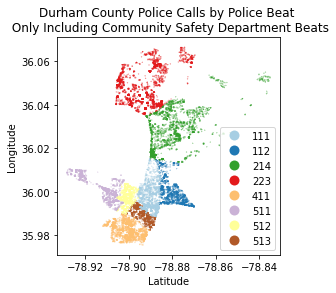

In [678]:
#Plot the two data sets together with only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
commsafe = dpd_w_policebeats.loc[dpd_w_policebeats['LAWBEAT'].isin(commsafe_list)].copy()
commsafe.head()

fig, ax=plt.subplots()

commsafe.plot(column='LAWBEAT', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.04, 
                         cmap="Paired", ax=ax, aspect=1);

ax.set(title='Durham County Police Calls by Police Beat \n Only Including Community Safety Department Beats')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [679]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

,Beat,calls_count
0,111,2422
1,112,2351
2,113,2751
3,114,2771
4,121,2491


In [680]:
#Copy policebeats and rename column LAWBEAT
policebeats2 = policebeats.copy()

policebeats2.rename(columns=({'LAWBEAT':'Beat'}), inplace=True)

In [681]:
#Change Beat column to a string in policebeats2 data set
policebeats2["Beat"] = policebeats2["Beat"].map(lambda g: str(int(g+0.1)))

In [682]:
#Find the beat with highest proportion of priority levels 2-6
#Create filtered call data with only 2-6 calls
twotosix = ['2', '3', '4', '5', '6']

twosixcalls = dpdcalls[dpdcalls['Priority'].isin(twotosix)]

twosixcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


In [683]:
#Grouping policebeats_w_dpd by beat
#Create a new data frame called allcalls
allcalls = policebeats_w_dpd.groupby(['Beat']).size().to_frame(name = 'calls_count').reset_index()
allcalls.head()

,Beat,calls_count
0,111,2422
1,112,2351
2,113,2751
3,114,2771
4,121,2491


In [684]:
#Grouping 2-6 calls by beat
#Creating new data frame called onlytwosix
onlytwosix = twosixcalls.groupby(['Beat']).size().to_frame(name = '2_to_6_calls_count').reset_index()
onlytwosix.head()

,Beat,2_to_6_calls_count
0,111,2422
1,112,2351
2,113,2751
3,114,2786
4,121,2530


In [685]:
#Add a proportions column to combcalls
combcalls2 = pd.merge(allcalls, onlytwosix, on ='Beat')

combcalls2['prop_of_2_6_calls']= combcalls2['2_to_6_calls_count'] / combcalls2['calls_count']

combcalls2.sort_values(by='prop_of_2_6_calls', inplace=True, ascending=False)

combcalls2.head()

,Beat,calls_count,2_to_6_calls_count,prop_of_2_6_calls
7,124,1825,1858,1.018082
4,121,2491,2530,1.015656
6,123,2602,2638,1.013836
27,414,3280,3318,1.011585
31,423,5300,5349,1.009245


In [686]:
#Merge policebeats data with combcalls2
#Label merged data as combcalls2_merge
combcalls2_merge = pd.merge(combcalls2, policebeats2, on ='Beat')

combcalls2_merge.head(3)

,Beat,calls_count,2_to_6_calls_count,prop_of_2_6_calls,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,LBeat,id
0,124,1825,1858,1.018082,"MULTIPOLYGON (((-78.77636 35.92139, -78.77722 ...",63,10708.070312,I,no,D1,124,None,3.022588e+06,10708.070450,124,7
1,121,2491,2530,1.015656,"MULTIPOLYGON (((-78.80746 35.99706, -78.80746 ...",38,14495.120117,I,no,D1,121,None,7.008533e+06,14495.120026,121,4
2,123,2602,2638,1.013836,"MULTIPOLYGON (((-78.83723 36.00399, -78.83722 ...",55,74375.859375,I,yes,D1,123,None,7.495698e+07,74375.856455,123,6


In [687]:
#Merged the data with combcalls by changing the index
combcalls2_merge = policebeats2.set_index('Beat').join(combcalls2.set_index('Beat'))

combcalls2_merge.head(3)

,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,LBeat,id,calls_count,2_to_6_calls_count,prop_of_2_6_calls
Beat,,,,,,,,,,,,,,,
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0,2422,2422,1.0
112,"POLYGON ((-78.88787 36.01473, -78.88734 36.014...",51,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1,2351,2351,1.0
113,"POLYGON ((-78.87372 35.99369, -78.87458 35.991...",62,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2,2751,2751,1.0


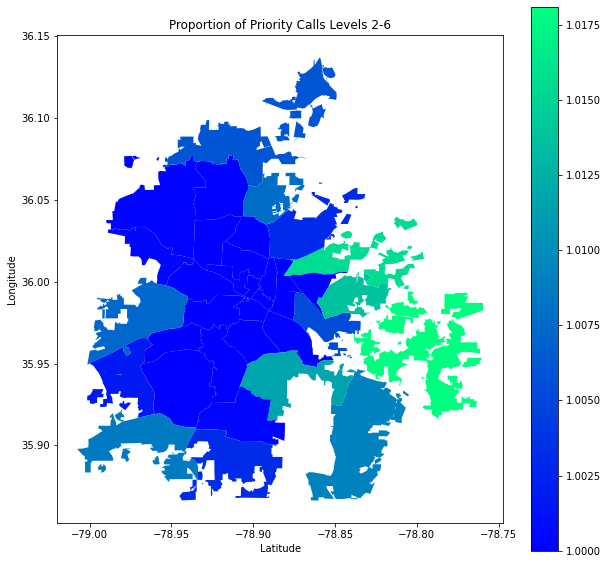

In [688]:
#Plot choropleth map of proportion of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='prop_of_2_6_calls',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Proportion of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

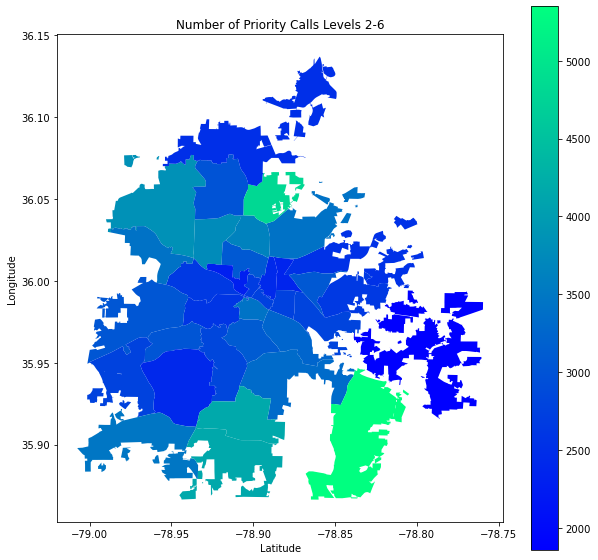

In [689]:
#Plot choropleth map of number of priority 2-6 calls with merged data
fig, ax = plt.subplots(figsize = (10,10))

combcalls2_merge.plot(column='2_to_6_calls_count',  
                         legend=True,  
                         cmap="winter", ax=ax, aspect=1);

ax.set(title='Number of Priority Calls Levels 2-6')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [771]:
#Merged combcalls2_merge with dpdcalls
combcalls3 = gpd.sjoin(combcalls2_merge, dpdcalls)
combcalls3.head()

,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,...,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled
Beat,,,,,,,,,,,,,,,,,,,,,
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,3,SUSPICIOUS PERSON,700 EVA ST,2032833,816481,D1,111,Resolved Without Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Phone Call,4,ABANDONED VEHICLE,700 LIBERTY ST,2032653,816485,D1,111,Unfounded,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,4,DAMAGE TO PROPERTY,700 LIBERTY ST,2032638,816487,D1,111,Resolved Without Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,3,RUNAWAY,700 LIBERTY ST,2032680,816488,D1,111,Incident Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Phone Call,4,NOISE COMPLAINT,EVA ST/RAILROAD ST,2032540,816526,D1,111,Unfounded,0


In [772]:
#Filter combcalls3 for only community safety beats
commsafe_list2 = ['511', '512', '513', '411', '111', '112', '214', '223']
combcalls3_comsafe = combcalls3.loc[combcalls3['Beat'].isin(commsafe_list2)].copy()
combcalls3_comsafe

,geometry,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,...,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled
Beat,,,,,,,,,,,,,,,,,,,,,
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,3,SUSPICIOUS PERSON,700 EVA ST,2032833,816481,D1,111,Resolved Without Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Phone Call,4,ABANDONED VEHICLE,700 LIBERTY ST,2032653,816485,D1,111,Unfounded,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,4,DAMAGE TO PROPERTY,700 LIBERTY ST,2032638,816487,D1,111,Resolved Without Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Wireless 911 Call,3,RUNAWAY,700 LIBERTY ST,2032680,816488,D1,111,Incident Report,0
111,"POLYGON ((-78.89039 36.01517, -78.89038 36.015...",50,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,...,Phone Call,4,NOISE COMPLAINT,EVA ST/RAILROAD ST,2032540,816526,D1,111,Unfounded,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,"POLYGON ((-78.89561 35.99710, -78.89553 35.997...",61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,...,Wireless 911 Call,3,WELFARE CHECK,200 HOOD ST,2031033,815102,D5,513,Resolved Without Report,0
513,"POLYGON ((-78.89561 35.99710, -78.89553 35.997...",61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,...,Wireless 911 Call,3,TRESPASS OR UNWANTED,200 HOOD ST,2030970,815102,D5,513,Resolved Without Report,0
513,"POLYGON ((-78.89561 35.99710, -78.89553 35.997...",61,20647.179688,I,yes,D5,513,None,9.114313e+06,20647.175971,...,Wireless 911 Call,3,TRESPASS OR UNWANTED,200 HOOD ST,2030971,815105,D5,513,Incident Report,0


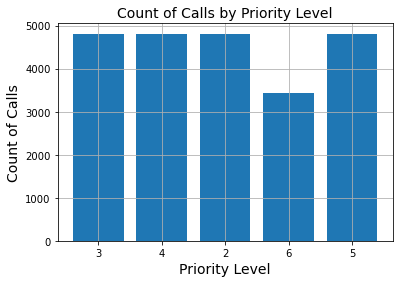

In [773]:
#Bar plot of priority calls
plt.bar(combcalls3_comsafe['Priority'], combcalls3_comsafe['2_to_6_calls_count'])
plt.title('Count of Calls by Priority Level', fontsize=14)
plt.xlabel('Priority Level', fontsize=14)
plt.ylabel('Count of Calls', fontsize=14)
plt.grid(True)
plt.show()

In [690]:
##Census Data Analysis
#Load in census data for North Carolina
ncblockmap = gpd.read_file('/Users/sadiesheridan/Desktop/tl_2021_37_tabblock20/tl_2021_37_tabblock20.shp')
ncblockmap.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."


In [691]:
#Set the crs for the census data
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [692]:
#Load in race data from census bureau
#Change id variable to GEOID20
racedata = pd.read_csv('/Users/sadiesheridan/Downloads/Race data/DECENNIALPL2020.P1_data_with_overlays_2022-06-06T132656.csv', skiprows = 1)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata.head()

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,...,!!Total:!!Population of two or more races:!!Population of five races:,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of six races:,!!Total:!!Population of two or more races:!!Population of six races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,GEOID20
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,...,0,0,0,0,0,0,0,0,0,370630001011000
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,...,0,0,0,0,0,0,0,0,0,370630001011001
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,...,0,0,0,0,0,0,0,0,0,370630001011002
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,370630001011003
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,...,0,0,0,0,0,0,0,0,0,370630001011004


In [693]:
#Filter the block map to only include Durham blocks (63)
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4402, 35)

In [694]:
#Merge the Durham block data with the race data
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap.head()

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,...,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,"Block 1000, Block Group 1, Census Tract 1.01, ...",108,102,18,61,3,0,0,20,6,...,G5040,R,None,None,S,655575,0,+36.0194814,-078.8821382,"POLYGON ((-78.88998 36.01852, -78.88995 36.019..."
1,"Block 1001, Block Group 1, Census Tract 1.01, ...",35,28,13,5,0,0,0,10,7,...,G5040,R,None,None,S,23209,0,+36.0205516,-078.8893121,"POLYGON ((-78.88993 36.02006, -78.88990 36.021..."
2,"Block 1002, Block Group 1, Census Tract 1.01, ...",38,34,17,9,0,0,0,8,4,...,G5040,R,None,None,S,17466,0,+36.0205916,-078.8869754,"POLYGON ((-78.88749 36.02015, -78.88746 36.021..."
3,"Block 1003, Block Group 1, Census Tract 1.01, ...",43,43,21,19,0,0,0,3,0,...,G5040,R,None,None,S,22809,0,+36.0205318,-078.8880959,"POLYGON ((-78.88872 36.01988, -78.88867 36.021..."
4,"Block 1004, Block Group 1, Census Tract 1.01, ...",31,30,5,18,0,1,0,6,1,...,G5040,R,None,None,S,21727,0,+36.0221289,-078.8796703,"POLYGON ((-78.88098 36.02211, -78.87992 36.022..."


In [695]:
#Make index GEOID20
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,...,!!Total:!!Population of two or more races:!!Population of four races:!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of six races:,!!Total:!!Population of two or more races:!!Population of six races:!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race
GEOID20,,,,,,,,,,,,,,,,,,,,,
370630018064007,37,063,001806,4007,Block 4007,G5040,R,None,None,S,...,0,0,0,0,0,0,0,0,0,0
370630018017028,37,063,001801,7028,Block 7028,G5040,R,None,None,S,...,0,0,0,0,0,0,0,0,0,0
370630021004022,37,063,002100,4022,Block 4022,G5040,R,None,None,S,...,0,0,0,0,0,0,0,0,0,0


In [696]:
#Check the geometry of the merged data
durhamracemap.geometry

GEOID20
370630018064007    POLYGON ((-78.82464 36.01317, -78.82456 36.013...
370630018017028    POLYGON ((-78.80507 36.06321, -78.80467 36.063...
370630021004022    POLYGON ((-78.83005 36.15072, -78.83001 36.150...
370630020362000    POLYGON ((-78.91718 35.90556, -78.91702 35.905...
370630018017041    POLYGON ((-78.83393 36.05431, -78.83343 36.055...
                                         ...                        
370630022002048    POLYGON ((-78.89882 35.99520, -78.89875 35.995...
370630022001012    POLYGON ((-78.90950 36.00137, -78.90934 36.001...
370630007003016    POLYGON ((-78.92578 35.97207, -78.92571 35.972...
370630020262014    POLYGON ((-78.89767 35.94758, -78.89762 35.947...
370630013011001    POLYGON ((-78.89541 35.98186, -78.89538 35.981...
Name: geometry, Length: 4401, dtype: geometry

In [697]:
#Change the column names for durhamracemap
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

warnings.filterwarnings('ignore')

In [698]:
#Find the proportion of specific races compared to the total population
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']

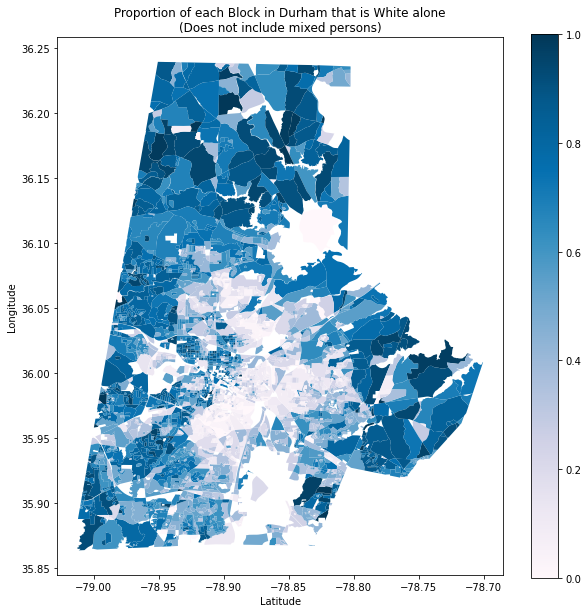

In [699]:
#Plot choropleth map with merged data for white population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

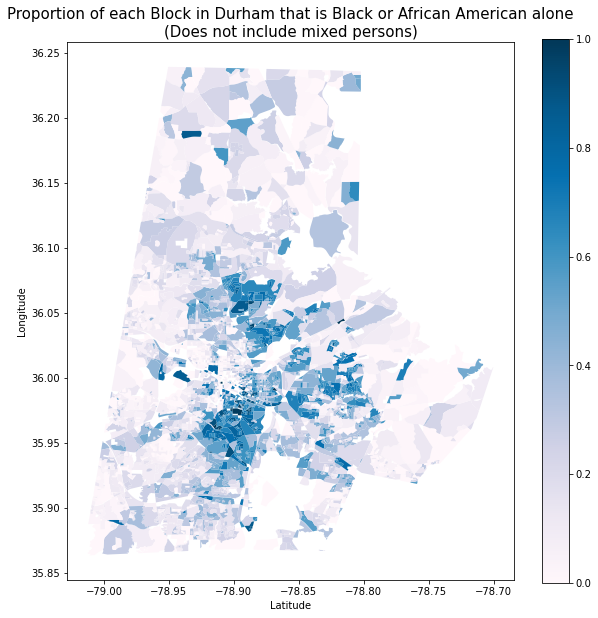

In [700]:
#Plot choropleth map with merged data for Black population
fig, ax = plt.subplots(figsize = (10,10))

durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [701]:

#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])

warnings.filterwarnings('ignore')

In [702]:
#Look at the first five rows of cblockDurhamBeats
cblockDurhamBeats.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat
88,37,063,002036,2000,370630020362000,Block 2000,G5040,R,None,None,S,286743,3982,+35.9051346,-078.9104302,"POLYGON ((-78.91718 35.90556, -78.91702 35.905...",421
328,37,063,002020,1013,370630020201013,Block 1013,G5040,R,None,None,S,96212,4557,+35.8938510,-078.9448088,"POLYGON ((-78.94746 35.89382, -78.94727 35.893...",324
338,37,063,001712,2001,370630017122001,Block 2001,G5040,R,None,None,S,1274264,49745,+36.0548720,-078.9454010,"POLYGON ((-78.95554 36.05137, -78.95553 36.051...",221
491,37,063,001708,4002,370630017084002,Block 4002,G5040,R,None,None,S,363083,3607,+36.0776513,-078.8796988,"POLYGON ((-78.88862 36.07515, -78.88839 36.075...",224
536,37,063,001801,1025,370630018011025,Block 1025,G5040,R,None,None,S,107654,7350,+36.0128630,-078.8662020,"POLYGON ((-78.86911 36.01263, -78.86898 36.012...",121


In [703]:
#Creating cblockDurhamBeats with only beats that the safety department works with
cblockcomsafebeats = cblockDurhamBeats.copy()
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
cblockcomsafebeats = cblockDurhamBeats.loc[cblockDurhamBeats['Beat'].isin(commsafe_list)].copy()
cblockcomsafebeats

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Beat
874,37,063,001709,3001,370630017093001,Block 3001,G5040,R,None,None,S,918860,1497,+36.0511955,-078.8989718,"POLYGON ((-78.90312 36.05133, -78.90293 36.051...",223
3649,37,063,001801,6041,370630018016041,Block 6041,G5040,R,None,None,S,212123,9487,+36.0155379,-078.8706505,"POLYGON ((-78.87550 36.01421, -78.87371 36.014...",214
10944,37,063,000101,1028,370630001011028,Block 1028,G5040,R,None,None,S,435000,2847,+36.0161756,-078.8795383,"POLYGON ((-78.88806 36.01514, -78.88789 36.015...",214
11876,37,063,001801,6033,370630018016033,Block 6033,G5040,R,None,None,S,131608,6435,+36.0263370,-078.8611270,"POLYGON ((-78.86503 36.02664, -78.86499 36.026...",214
12204,37,063,001801,7005,370630018017005,Block 7005,G5040,R,None,None,S,11498,1223,+36.0602307,-078.8586903,"POLYGON ((-78.85984 36.06053, -78.85928 36.060...",214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235109,37,063,002200,2031,370630022002031,Block 2031,G5040,R,None,None,S,14546,0,+35.9983414,-078.8990835,"POLYGON ((-78.89993 35.99915, -78.89960 35.998...",512
235830,37,063,002300,1027,370630023001027,Block 1027,G5040,R,None,None,S,57219,0,+35.9854948,-078.9077482,"POLYGON ((-78.90906 35.98449, -78.90900 35.984...",411
236139,37,063,002200,2048,370630022002048,Block 2048,G5040,R,None,None,S,10849,0,+35.9949422,-078.8981501,"POLYGON ((-78.89882 35.99520, -78.89875 35.995...",512
236183,37,063,002200,1012,370630022001012,Block 1012,G5040,R,None,None,S,11653,0,+36.0007075,-078.9093748,"POLYGON ((-78.90950 36.00137, -78.90934 36.001...",511


In [704]:
#Creating beat combined with race and blocks but keeping block geometries
blockswithrace = gpd.sjoin(durhamracemap, cblockcomsafebeats)
blockswithrace['propwhite']= blockswithrace['total_population_of_one_race_white_alone'] / blockswithrace['total_']
blockswithrace.head(3)

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,...,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Beat
GEOID20,,,,,,,,,,,,,,,,,,,,,
370630018017041,37,063,001801,7041,Block 7041,G5040,R,None,None,S,...,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214
370630018016014,37,063,001801,6014,Block 6014,G5040,R,None,None,S,...,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214
370630018016009,37,063,001801,6009,Block 6009,G5040,R,None,None,S,...,G5040,R,None,None,S,100889,0,+36.0519717,-078.8336224,214


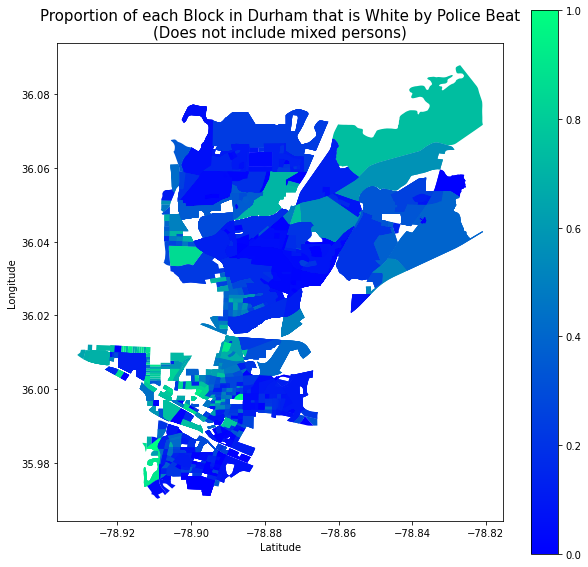

In [705]:
#Plot the proportion of white people by block in just the saftey department beats
fig, ax = plt.subplots(figsize = (10,10))
blockswithrace.plot(column='propwhite',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [706]:
#Merging race data into the police beat and block data
beatswithrace = gpd.sjoin(cblockDurhamBeats, durhamracemap)
beatswithrace.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_six_races_,total_population_of_two_or_more_races_population_of_six_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,propwhite,propblack
88,37,063,002036,2000,370630020362000,Block 2000,G5040,R,None,None,...,0,0,0,0,0,0,0,0,0.68254,0.063492
2904,37,063,002013,2001,370630020132001,Block 2001,G5040,R,None,None,...,0,0,0,0,0,0,0,0,0.68254,0.063492
14347,37,063,002013,1000,370630020131000,Block 1000,G5040,R,None,None,...,0,0,0,0,0,0,0,0,0.68254,0.063492


In [707]:
#Grouping the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat.head()

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,...,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_white;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_five_races_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_six_races_,total_population_of_two_or_more_races_population_of_six_races_white;_black_or_african_american;_american_indian_and_alaska_native;_asian;_native_hawaiian_and_other_pacific_islander;_some_other_race,propwhite,propblack
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,...,0,6,0,0,0,0,0,0,224.561182,218.954917
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,...,0,14,0,0,0,0,3,3,51.668028,114.482844
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,...,0,0,0,0,0,0,8,8,111.234878,271.019346
3,114,56673958,441791,65789793,437720,53897,50407,7336,28270,751,...,0,3,0,0,0,0,5,5,89.477459,207.086562
4,121,154087358,1453287,147654293,1312755,66559,62690,14281,35776,804,...,0,4,0,0,0,0,0,0,156.976578,236.607895


In [708]:
#Adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat.head(3)

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,...,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,LBeat,id
0,111,17579442,0,18746893,6947,32720,29638,10243,13202,728,...,28608.800781,I,yes,D1,111,None,2.010252e+07,28608.799743,111,0
1,112,17718915,0,19961528,6947,27224,25303,4356,10636,918,...,26265.849609,I,yes,D1,112,None,2.079934e+07,26265.852604,112,1
2,113,20482283,13325,18511210,5125,35128,33053,7084,17577,585,...,20667.539062,I,yes,D1,113,None,2.159195e+07,20667.538873,113,2


In [785]:
#Adding new columns to race in police beat data set
raceineachbeat['area'] = raceineachbeat.area
raceineachbeat['popdensity']= raceineachbeat['total_'] / raceineachbeat['area']
raceineachbeat['propwhite']= raceineachbeat['total_population_of_one_race_white_alone'] / raceineachbeat['total_']
raceineachbeat['propblack']= raceineachbeat['total_population_of_one_race_black_or_african_american_alone'] / raceineachbeat['total_']
raceineachbeat['propnativeamerican']= raceineachbeat['total_population_of_one_race_american_indian_and_alaska_native_alone'] / raceineachbeat['total_']
raceineachbeat['propasian']= raceineachbeat['total_population_of_one_race_asian_alone'] / raceineachbeat['total_']
raceineachbeat['proppacislander']= raceineachbeat['total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone'] / raceineachbeat['total_']
raceineachbeat['other']= raceineachbeat['total_'] - raceineachbeat['total_population_of_one_race_']
raceineachbeat['propother']= raceineachbeat['other'] / raceineachbeat['total_']
raceineachbeat.head()

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_popul

In [788]:
#Sorting by population density
raceineachbeat.sort_values(by='popdensity', inplace=True, ascending=False)
raceineachbeat.head()

,Beat,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_popul

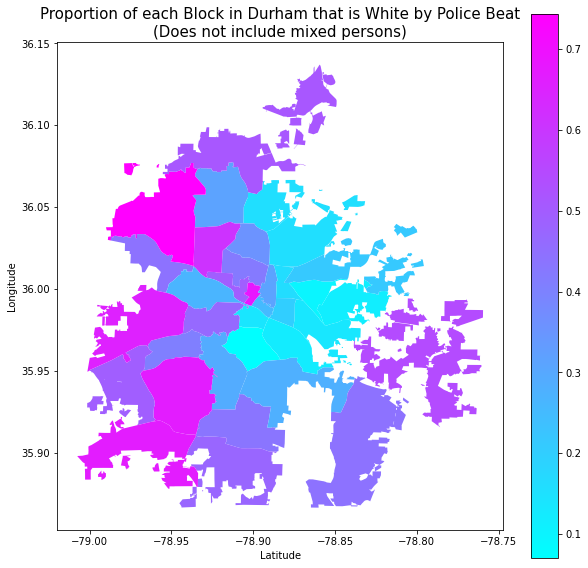

In [789]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propwhite',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

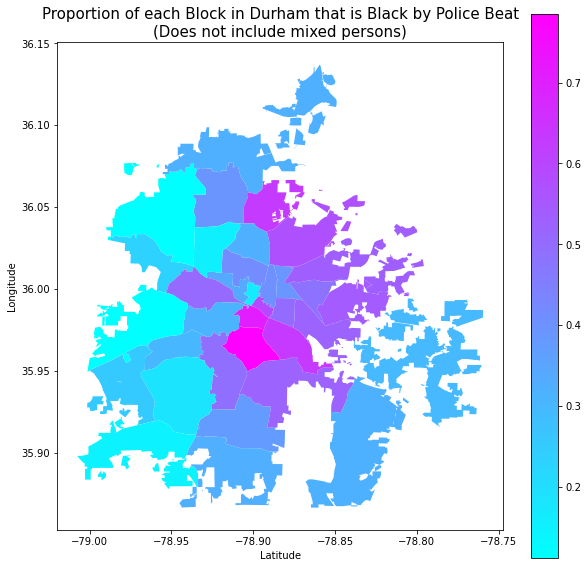

In [790]:
#Plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='propblack',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

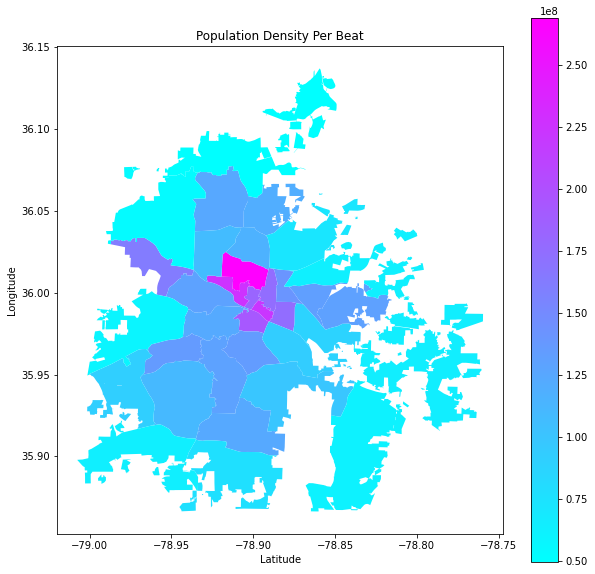

In [713]:
#Plot the population density data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column='popdensity',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Population Density Per Beat")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [792]:
#Merge call data with raceineachbeat
beatracewithcalls = gpd.sjoin(raceineachbeat, dpdcalls)
beatracewithcalls.head()

,Beat_left,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_

In [793]:
#Filter out beatracewithcalls for only community safety beats
commsafe_list = [511, 512, 513, 411, 111, 112, 214, 223]
beatracewithcalls2 = beatracewithcalls.loc[beatracewithcalls['LAWBEAT'].isin(commsafe_list)].copy()
beatracewithcalls2.head()

,Beat_left,ALAND20,AWATER20,aland20,awater20,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_asian;_native_hawaiian_and_other_pacific_islander,total_

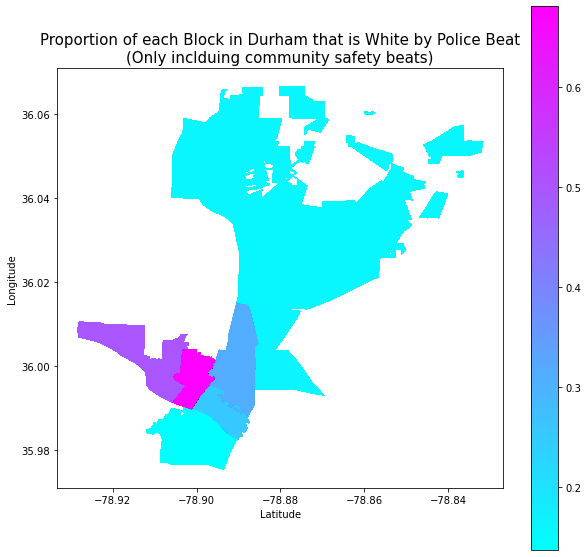

In [716]:
#Plot the race data by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='propwhite',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is White by Police Beat\n(Only inclduing community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

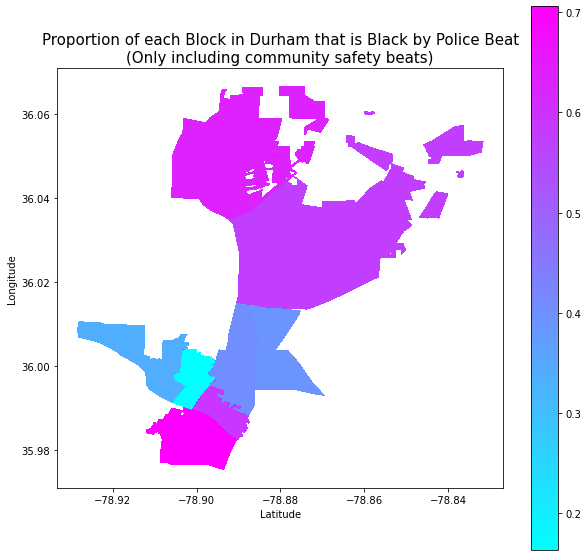

In [717]:
#Plot the race data by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='propblack',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Proportion of each Block in Durham that is Black by Police Beat\n(Only including community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

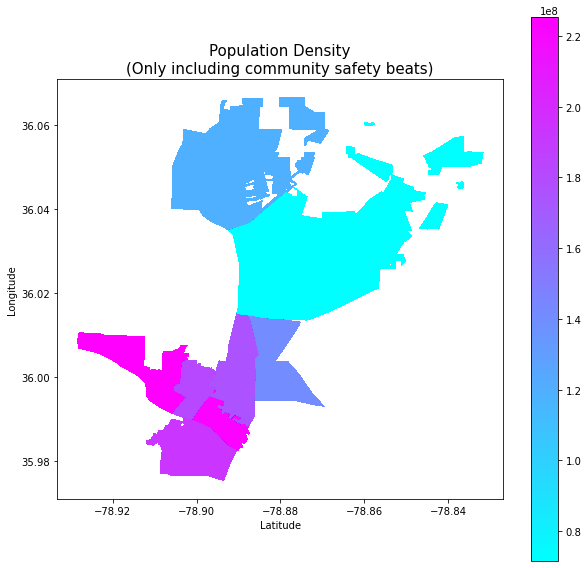

In [718]:
#Plot the population density by beat for com safe beats
fig, ax = plt.subplots(figsize = (10,10))
beatracewithcalls2.plot(column='popdensity',
                                legend=True,
                                cmap="cool", ax=ax, aspect=1);

plt.title("Population Density\n(Only including community safety beats)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

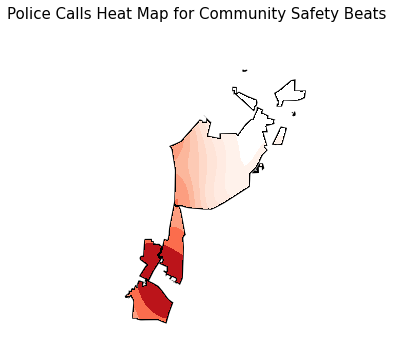

In [794]:
#Heat map of call density
ax = gplt.kdeplot(
    dpdcalls, clip=beatracewithcalls2.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(beatracewithcalls2, ax=ax, zorder=1)

plt.title("Police Calls Heat Map for Community Safety Beats", fontsize = 15)
plt.show()

In [795]:
#Filter calls and beats for just beat 214
beat214 = policebeats.loc[policebeats['LAWBEAT'] == 214]
beat214calls = dpdcalls.loc[dpdcalls['Beat'] == '214']

In [856]:
beat214calls.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

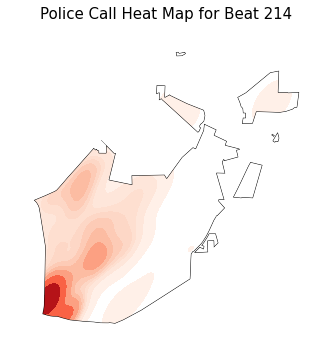

In [872]:
#Plot just data for beat 214 in a heatmap
ax = gplt.kdeplot(
    beat214calls, clip=beat214.geometry,
    shade=True, cmap='Reds',
    projection=gplt.crs.AlbersEqualArea())
gplt.polyplot(beat214, ax=ax, zorder=1)

plt.title("Police Call Heat Map for Beat 214", fontsize = 15)
plt.show()

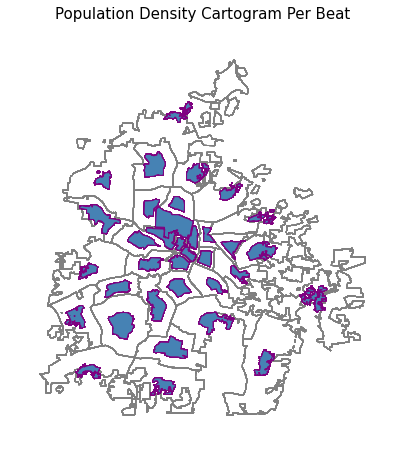

In [748]:
# #Cartogram of population density
# ax = gplt.cartogram(
#     beatracewithcalls, scale='popdensity', limits=(0.2, 1),
#     edgecolor='Purple', figsize=(7, 8)
# )
# gplt.polyplot(beatracewithcalls, edgecolor='gray', ax=ax)

# plt.title("Population Density Cartogram Per Beat", fontsize = 15)
# plt.show()

In [838]:
#Create new data frame with just proportions for community safety beats
justprop = beatracewithcalls2[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
justprop.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
justprop.head()

,White,Black,Native American,Asian,Other
32,0.495916,0.336288,0.002356,0.077715,0.057316
32,0.495916,0.336288,0.002356,0.077715,0.057316
32,0.495916,0.336288,0.002356,0.077715,0.057316
32,0.495916,0.336288,0.002356,0.077715,0.057316
32,0.495916,0.336288,0.002356,0.077715,0.057316


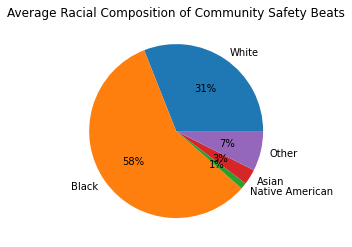

In [839]:
#Pie chart for justprop
justprop.mean().plot.pie(ylabel='', title='Average Racial Composition of Community Safety Beats', autopct='%1.0f%%');

In [836]:
#Create new data frame that is just proportions for all of Durham
justpropDurham = beatracewithcalls[['propwhite', 'propblack', 'propnativeamerican', 'propasian', 'propother']]

#Change column names
justpropDurham.rename(columns = {'propwhite':'White', 'propblack':'Black', 'propnativeamerican':'Native American', 'propasian':'Asian', 'propother':'Other'}, inplace = True)
justpropDurham.head()

,White,Black,Native American,Asian,Other
9,0.420777,0.416196,0.006034,0.022675,0.06863
9,0.420777,0.416196,0.006034,0.022675,0.06863
9,0.420777,0.416196,0.006034,0.022675,0.06863
9,0.420777,0.416196,0.006034,0.022675,0.06863
9,0.420777,0.416196,0.006034,0.022675,0.06863


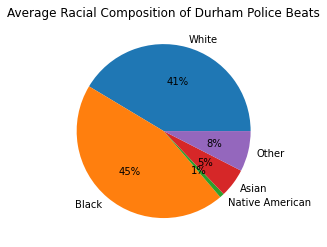

In [837]:
#Pie chart for justpropDurham
justpropDurham.mean().plot.pie(ylabel='', title='Average Racial Composition of Durham Police Beats', autopct='%1.0f%%');